# Concentration de CO2 dans l'atmosphère depuis 1958

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os.path
import xlrd
import math

On utilise les données du *Scripps CO2 Program* disponibles lors du 24 novembre 2023. Ces données sont stockées dans le fichier `monthly_in_situ_co2_mlo.csv`.

In [2]:
data_url = "monthly_in_situ_co2_mlo.csv" if os.path.isfile("monthly_in_situ_co2_mlo.csv") else "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv"



Les lignes 1 à 57 incluses ne sont que des commentaires à propos des méthodes de mesures, des auteurs, et des données elles-mêmes. Dans ces commentaires, on apprend qu'il y a 11 colonnes.

<table>
    <tr>
        <th>Yr</th>
        <td>L'année au format YYYY.</td>
    </tr>
    <tr>
        <th>Mn</th>
        <td>Le mois au format MM.</td>
    </tr>
    <tr>
        <th>Date</th>
        <td>La date au format Excel.</td>
    </tr>
    <tr>
        <th>Date.1</th>
        <td>La date en fraction d'année (par exemple, 1958.5000 correspond au millieu de l'année 1958)</td>
    </tr>
    <tr>
        <th>CO2</th>
        <td>CO2 en parties par million (ppm)</td>
    </tr>
    <tr>
        <th>seasonally</th>
        <td><b>CO2</b> après un ajustement saisonnier (ce qui permet d'enlever certaines oscillations)</td>
    </tr>
    <tr>
        <th>fit</th>
        <td><b>CO2</b> après un lissage (ce qui permet de boucher les trous dans les données)</td>
    <tr>
        <th>seasonally.1</th>
        <td><b>seasonally</b> après un lissage</td>
    </tr>
    <tr>
        <th>CO2.1</th>
        <td><b>CO2</b> où les trous ont été bouchés par les valeurs de <b>fit</b></td>
    </tr>
    <tr>
        <th>seasonally.2</th>
        <td><b>seasonally</b> où les trous ont été bouchés par les valeurs de <b>seasonally.1</b></td>
    </tr>
    <tr>
        <th>Sta</th>
        <td>Identifiant de la station faisant les mesures</td>
    </tr>
</table>

Puisque les lignes 1 à 57 ne sont que des commentaires, on les ignore. On met aussi l'option `skipinitialspace` à `True` pour enlever tous les caractères blancs en trop.

In [3]:
raw_data = pd.read_csv(data_url, skiprows=57, skipinitialspace=True)

raw_data[:10]

Yr   Mn   Date     Date.1     CO2 seasonally     fit  seasonally.1  \
0     NaN  NaN    NaN        NaN     NaN   adjusted     NaN  adjusted fit   
1     NaN  NaN  Excel        NaN   [ppm]     [ppm]    [ppm]         [ppm]   
2  1958.0  1.0  21200  1958.0411  -99.99     -99.99  -99.99        -99.99   
3  1958.0  2.0  21231  1958.1260  -99.99     -99.99  -99.99        -99.99   
4  1958.0  3.0  21259  1958.2027  315.71     314.44  316.19        314.91   
5  1958.0  4.0  21290  1958.2877  317.45     315.16  317.30        314.99   
6  1958.0  5.0  21320  1958.3699  317.51     314.69  317.89        315.06   
7  1958.0  6.0  21351  1958.4548  -99.99     -99.99  317.27        315.14   
8  1958.0  7.0  21381  1958.5370  315.87     315.20  315.85        315.22   
9  1958.0  8.0  21412  1958.6219  314.93     316.22  313.97        315.29   

    CO2.1     seasonally.2  Sta  
0  filled  adjusted filled  NaN  
1   [ppm]            [ppm]  NaN  
2  -99.99           -99.99  MLO  
3  -99.99           -99.99  MLO  
4  315.71           314.44  MLO  
5  317.45           315.16  MLO  
6  317.51           314.69  MLO  
7  317.27           315.14  MLO  
8  315.87           315.20  MLO  
9  314.93           316.22  MLO

On voit que les lignes 0 et 1 de notre tableau ne sont que des informations à propos des formats et des unités de mesure. Nous allons donc les retirer.

In [4]:
raw_data.drop(range(2), inplace=True)

raw_data[:10]

Yr    Mn   Date     Date.1     CO2 seasonally     fit seasonally.1  \
2   1958.0   1.0  21200  1958.0411  -99.99     -99.99  -99.99       -99.99   
3   1958.0   2.0  21231  1958.1260  -99.99     -99.99  -99.99       -99.99   
4   1958.0   3.0  21259  1958.2027  315.71     314.44  316.19       314.91   
5   1958.0   4.0  21290  1958.2877  317.45     315.16  317.30       314.99   
6   1958.0   5.0  21320  1958.3699  317.51     314.69  317.89       315.06   
7   1958.0   6.0  21351  1958.4548  -99.99     -99.99  317.27       315.14   
8   1958.0   7.0  21381  1958.5370  315.87     315.20  315.85       315.22   
9   1958.0   8.0  21412  1958.6219  314.93     316.22  313.97       315.29   
10  1958.0   9.0  21443  1958.7068  313.21     316.11  312.43       315.35   
11  1958.0  10.0  21473  1958.7890  -99.99     -99.99  312.42       315.41   

     CO2.1 seasonally.2  Sta  
2   -99.99       -99.99  MLO  
3   -99.99       -99.99  MLO  
4   315.71       314.44  MLO  
5   317.45       315.16  MLO  
6   317.51       314.69  MLO  
7   317.27       315.14  MLO  
8   315.87       315.20  MLO  
9   314.93       316.22  MLO  
10  313.21       316.11  MLO  
11  312.42       315.41  MLO

Pour avoir un maximum de données, nous allons travailler sur les colonnes **CO2.1** et **seasonally.2**, qui ont le moins de valeurs manquantes.  Nous allons donc enlever toutes les colonnes nous étant inutiles. Pour les dates, nous allons garder uniquement la colonne **Date**.

In [5]:
raw_data = raw_data.drop(["Yr", "Mn", "Date.1", "CO2", "seasonally", "fit", "seasonally.1", "Sta"], axis="columns")

raw_data[:10]

Date   CO2.1 seasonally.2
2   21200  -99.99       -99.99
3   21231  -99.99       -99.99
4   21259  315.71       314.44
5   21290  317.45       315.16
6   21320  317.51       314.69
7   21351  317.27       315.14
8   21381  315.87       315.20
9   21412  314.93       316.22
10  21443  313.21       316.11
11  21473  312.42       315.41

Un autre problème, qui n'est pas directement visible, est que les données sont actuellement des chaînes de caractères. Nous allons donc convertir **Date** en entier, tandis que nous convertirons **CO2.1** et **seasonally.2** en nombres à virgules.

In [6]:
raw_data["Date"] = raw_data["Date"].astype(int)
raw_data["CO2.1"] = raw_data["CO2.1"].astype(float)
raw_data["seasonally.2"] = raw_data["seasonally.2"].astype(float)

raw_data[:10]

Date   CO2.1  seasonally.2
2   21200  -99.99        -99.99
3   21231  -99.99        -99.99
4   21259  315.71        314.44
5   21290  317.45        315.16
6   21320  317.51        314.69
7   21351  317.27        315.14
8   21381  315.87        315.20
9   21412  314.93        316.22
10  21443  313.21        316.11
11  21473  312.42        315.41

Nous pouvons constater que certaines lignes contiennent la valeur -99.99. Les commentaires au début du fichier nous indiquent que cela correspond à des valeurs manquantes. Nous allons donc enlever toutes les lignes contenant ces valeurs.

In [7]:
raw_data = raw_data.drop(raw_data.index[raw_data['CO2.1'] == -99.99])

raw_data[:10]

Date   CO2.1  seasonally.2
4   21259  315.71        314.44
5   21290  317.45        315.16
6   21320  317.51        314.69
7   21351  317.27        315.14
8   21381  315.87        315.20
9   21412  314.93        316.22
10  21443  313.21        316.11
11  21473  312.42        315.41
12  21504  313.33        315.21
13  21534  314.67        315.44

Ensuite, nous voulons convertir les dates en objets Period, qui permettent d'avoir une meilleure visibilité pour les graphes.

In [8]:
dates = []
for i, date in enumerate(raw_data["Date"]):
    year, month, _, _, _, _ = xlrd.xldate.xldate_as_tuple(date, 0)
    dates.append(pd.Period(year=year, month=month, freq="M"))

raw_data["Date"] = dates

raw_data[:10]

Date   CO2.1  seasonally.2
4  1958-03  315.71        314.44
5  1958-04  317.45        315.16
6  1958-05  317.51        314.69
7  1958-06  317.27        315.14
8  1958-07  315.87        315.20
9  1958-08  314.93        316.22
10 1958-09  313.21        316.11
11 1958-10  312.42        315.41
12 1958-11  313.33        315.21
13 1958-12  314.67        315.44

Puisque nous voulons créer un graphe avec la date en abscisse, on définit la date comme l'index du tableau.

In [9]:
sorted_data = raw_data.set_index('Date')

sorted_data[:10]

CO2.1  seasonally.2
Date                         
1958-03  315.71        314.44
1958-04  317.45        315.16
1958-05  317.51        314.69
1958-06  317.27        315.14
1958-07  315.87        315.20
1958-08  314.93        316.22
1958-09  313.21        316.11
1958-10  312.42        315.41
1958-11  313.33        315.21
1958-12  314.67        315.44

Maintenant, on peut faire un graphe représentant le taux de CO2 dans l'atmosphère.

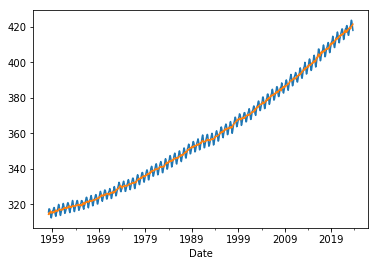

In [10]:
sorted_data["CO2.1"].plot()
sorted_data["seasonally.2"].plot()

Nous pouvons ains observer deux phénomènes. Le premier est que la quantité de CO2 dans l'atmosphère augmente avec le temps. Le deuxième est qu'il y a des oscillations récurrentes. Pour étudier ces oscillations, nous allons faire une soustraction entre la première courbe et la deuxième.

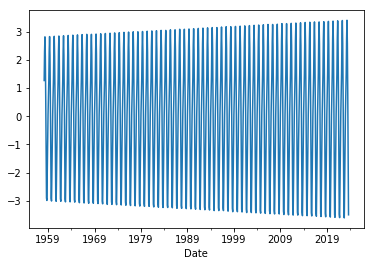

In [11]:
(sorted_data["CO2.1"] - sorted_data["seasonally.2"]).plot()

En zoomant un peu, nous réalisons que ces oscillations se répètent tous les ans, et oscille d'environ 6 ppm. Le pic le plus haut arrive vers le mois de mai, tandis que la falaise la plus basse arrive vers le mois de septembre.

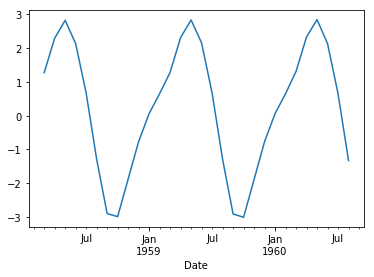

In [12]:
(sorted_data["CO2.1"] - sorted_data["seasonally.2"])[:30].plot()

La courbe correspondant à **CO2.1** semble au premier coup d'œil être une courbe exponentielle. En testant quelques valeurs, nous pouvons trouver cette courbe exponentielle.

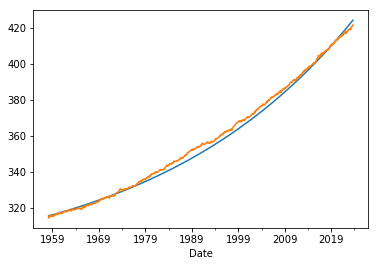

In [13]:
a = 31.5
lmbda = 0.0019
b = 284
sorted_data["approximation"] = [a * math.e**(lmbda*x) + b for x in range(len(sorted_data))]

sorted_data["approximation"].plot()
sorted_data["seasonally.2"].plot()

Maintenant, essayons avec cette approximation de prédire la concentration de CO2 dans l'atmosphère dans les prochaines années.

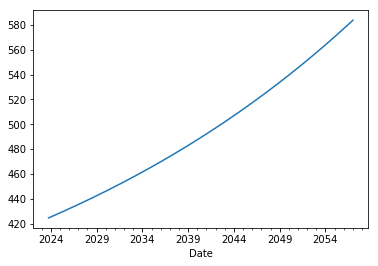

In [14]:
nb_months_to_predict = 400

last_period_in_data = raw_data["Date"][raw_data["Date"].keys()[-1]]
dates = []
for i in range(1, nb_months_to_predict+1):
    year, month = last_period_in_data.year + i//12, last_period_in_data.month + i%12
    dates.append(pd.Period(year=year, month=month, freq="M"))

a = 31.5
lmbda = 0.0019
b = 284
approximations = [a * math.e**(lmbda*x) + b for x in range(len(sorted_data), len(sorted_data)+nb_months_to_predict)]


data = {'Date': dates, 
        'approximation': approximations}

df = pd.DataFrame(data)
df = df.set_index('Date')

df["approximation"].plot()